In [95]:
# LOADING PACKAGE AND DATA

In [96]:
import os
import pandas as pd
import numpy as np

In [97]:
# Check current directory
current_directory = os.getcwd()

# Specify the file path
file_name = "./dataset/tiki1.csv"
file_path = os.path.join(current_directory, file_name)
df = pd.read_csv(file_path)

In [98]:
# Check if there are any null values
print(df.isnull().sum())

Link                 0
Name                 0
Brand                0
Price                0
Sale                 0
Stars               92
NumberOfCoupon     659
5 stars             92
4 stars             92
3 stars             92
2 stars             92
1 star              92
Reviews           1000
dtype: int64


In [99]:
# Check columns to make sure you have features and a target variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Link            1000 non-null   object 
 1   Name            1000 non-null   object 
 2   Brand           1000 non-null   object 
 3   Price           1000 non-null   object 
 4   Sale            1000 non-null   object 
 5   Stars           908 non-null    float64
 6   NumberOfCoupon  341 non-null    float64
 7   5 stars         908 non-null    float64
 8   4 stars         908 non-null    float64
 9   3 stars         908 non-null    float64
 10  2 stars         908 non-null    float64
 11  1 star          908 non-null    float64
 12  Reviews         0 non-null      float64
dtypes: float64(8), object(5)
memory usage: 101.7+ KB


In [100]:
# CLEAN DATA

In [101]:
# List of columns to drop
columns_to_drop = ['Reviews', 'Link', 'Name', 'Brand']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [102]:
# Add Category
df.loc[:199, 'Category'] =  1 #'Dụng cụ nhà bếp'
df.loc[200:399, 'Category'] = 2 #'Trang trí nhà cửa'
df.loc[400:599, 'Category'] = 3 #'Đồ dùng phòng ngủ'
df.loc[600:799, 'Category'] = 4 #'Ngoài trời sân vườn'
df.loc[800:999, 'Category'] = 5 #'Đồ nội thất'

In [103]:
# Impute missing value to specific columns
selected_columns = ['5 stars', '4 stars', '3 stars', '2 stars', '1 star', 'Stars']

# Iterate through selected columns and impute missing values with column means
for column in selected_columns:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

In [104]:
# Add 0 to null value in column NumberOfCoupon
df['NumberOfCoupon'].fillna(0, inplace=True)

In [105]:
# Convert numerical data to number (price, stars, sale)
# Convert price to int
df['Price'] = df['Price'].astype(str) # turn object to str
df['Price'] = df['Price'].str.replace(r'\D', '', regex=True).astype(int) # remove character

# Convert sale to int
df['Sale'] = df['Sale'].astype(str) # turn object to str
df['Sale'] = df['Sale'].str.replace(r'\D', '', regex=True).astype(int) # remove character

# Convert the '5 stars', .. '1 star' column to integers only if it's not null,
df[['5 stars', '4 stars', '3 stars', '2 stars', '1 star']] = df[['5 stars', '4 stars', '3 stars', '2 stars', '1 star']].apply(
    lambda x: pd.to_numeric(x, errors='coerce').astype(int)
) 

In [106]:
# Check if there are any null values
print(df.isnull().sum())

# Check columns to make sure you have features and a target variable
print(df)

Price             0
Sale              0
Stars             0
NumberOfCoupon    0
5 stars           0
4 stars           0
3 stars           0
2 stars           0
1 star            0
Category          0
dtype: int64
      Price  Sale     Stars  NumberOfCoupon  5 stars  4 stars  3 stars  \
0    441000  5000  4.600000             5.0      110       20        8   
1    518000  3027  4.500000             5.0       67       18        2   
2    132000  2196  5.000000             0.0        5        0        0   
3    693000  5000  4.600000             5.0      441      110       21   
4    231000  4580  5.000000             5.0      821       71        8   
..      ...   ...       ...             ...      ...      ...      ...   
995  105000    56  4.500000             0.0        4        5        0   
996   45000    98  5.000000             0.0        4        0        0   
997   24900    25  5.000000             4.0        2        0        0   
998  220000    41  4.100000             0.0    

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
# DESCRIPTIVE STATISTICS

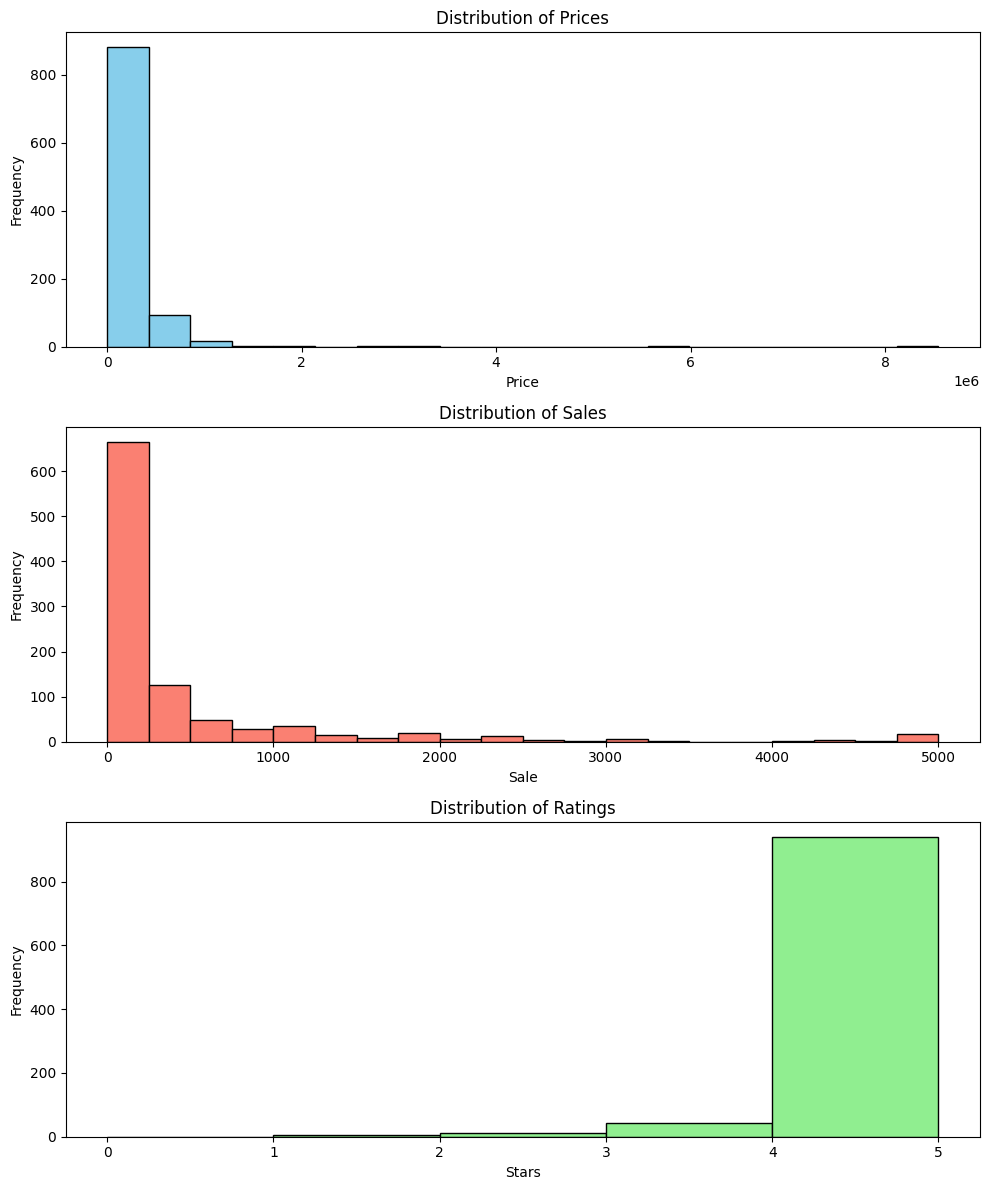

In [109]:
# Plot histograms
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# Histogram for 'Price'
axes[0].hist(df['Price'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Prices')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Histogram for 'Sale'
axes[1].hist(df['Sale'].dropna(), bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Distribution of Sales')
axes[1].set_xlabel('Sale')
axes[1].set_ylabel('Frequency')

# Histogram for 'Stars'
axes[2].hist(df['Stars'].dropna(), bins=5, range=(0, 5), color='lightgreen', edgecolor='black')
axes[2].set_title('Distribution of Ratings')
axes[2].set_xlabel('Stars')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [110]:
# Summary count, mean, std, min, max, 25% quantile, 50% quantile, 75% quantile 
selected_columns = ['Price', 'Sale', 'Stars', 'NumberOfCoupon']

summary_table = df[selected_columns].describe().transpose()

# Display the summary table
print("Summary Statistics:")
print(summary_table)

Summary Statistics:
                 count           mean            std     min      25%  \
Price           1000.0  207014.408000  414736.946722  1000.0  42750.0   
Sale            1000.0     456.473000     883.563560     1.0     41.0   
Stars           1000.0       4.563767       0.505464     1.0      4.5   
NumberOfCoupon  1000.0       1.189000       2.039961     0.0      0.0   

                     50%       75%        max  
Price           110000.0  229625.0  8549000.0  
Sale               126.0     407.0     5000.0  
Stars                4.6       4.8        5.0  
NumberOfCoupon       0.0       2.0       17.0  


In [111]:
What is the percentage of sale for each category?
What is the total sales for each category?

Object `category` not found.
Object `category` not found.


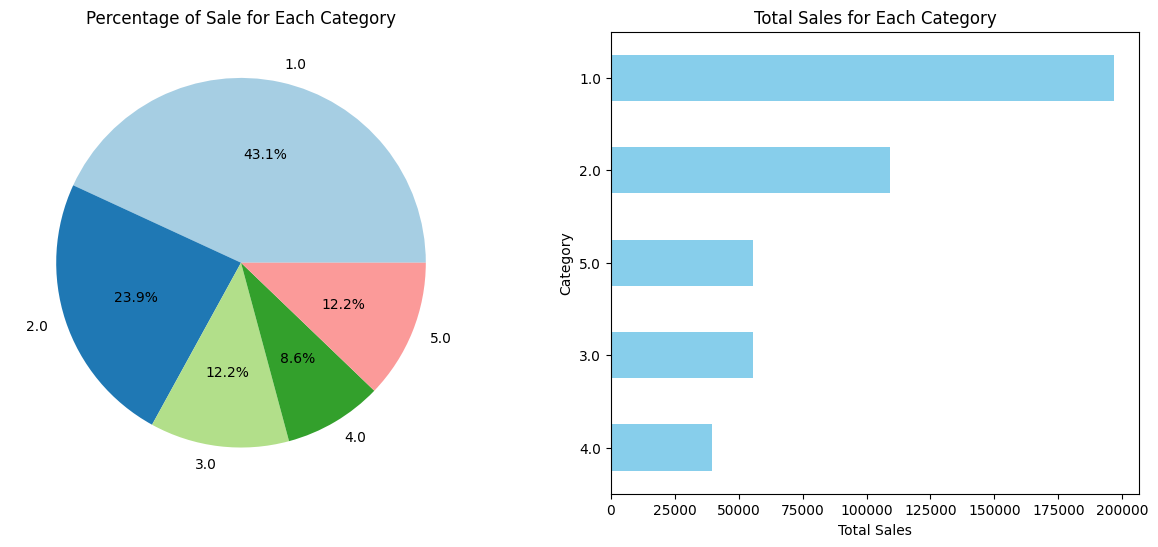

In [112]:
df['Sale'] = pd.to_numeric(df['Sale'], errors='coerce')  # Convert 'Sale' column to numeric

# Group by 'Category' and calculate the sum of sales for each category
category_sales = df.groupby('Category')['Sale'].sum()

# Calculate the total sale for all categories
total_sale = category_sales.sum()

# Calculate the percentage of sale for each category
percentage_sale = (category_sales / total_sale) * 100

# Plot the pie chart
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Pie chart
axes[0].pie(percentage_sale, labels=percentage_sale.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
axes[0].set_title('Percentage of Sale for Each Category')
axes[0].set_ylabel('')  # Remove the default 'Category' label

# Bar chart
category_sales.sort_values().plot(kind='barh', ax=axes[1], color='skyblue')
axes[1].set_title('Total Sales for Each Category')
axes[1].set_xlabel('Total Sales')

plt.show()

In [113]:
# STATISTICAL CALCULATIONS

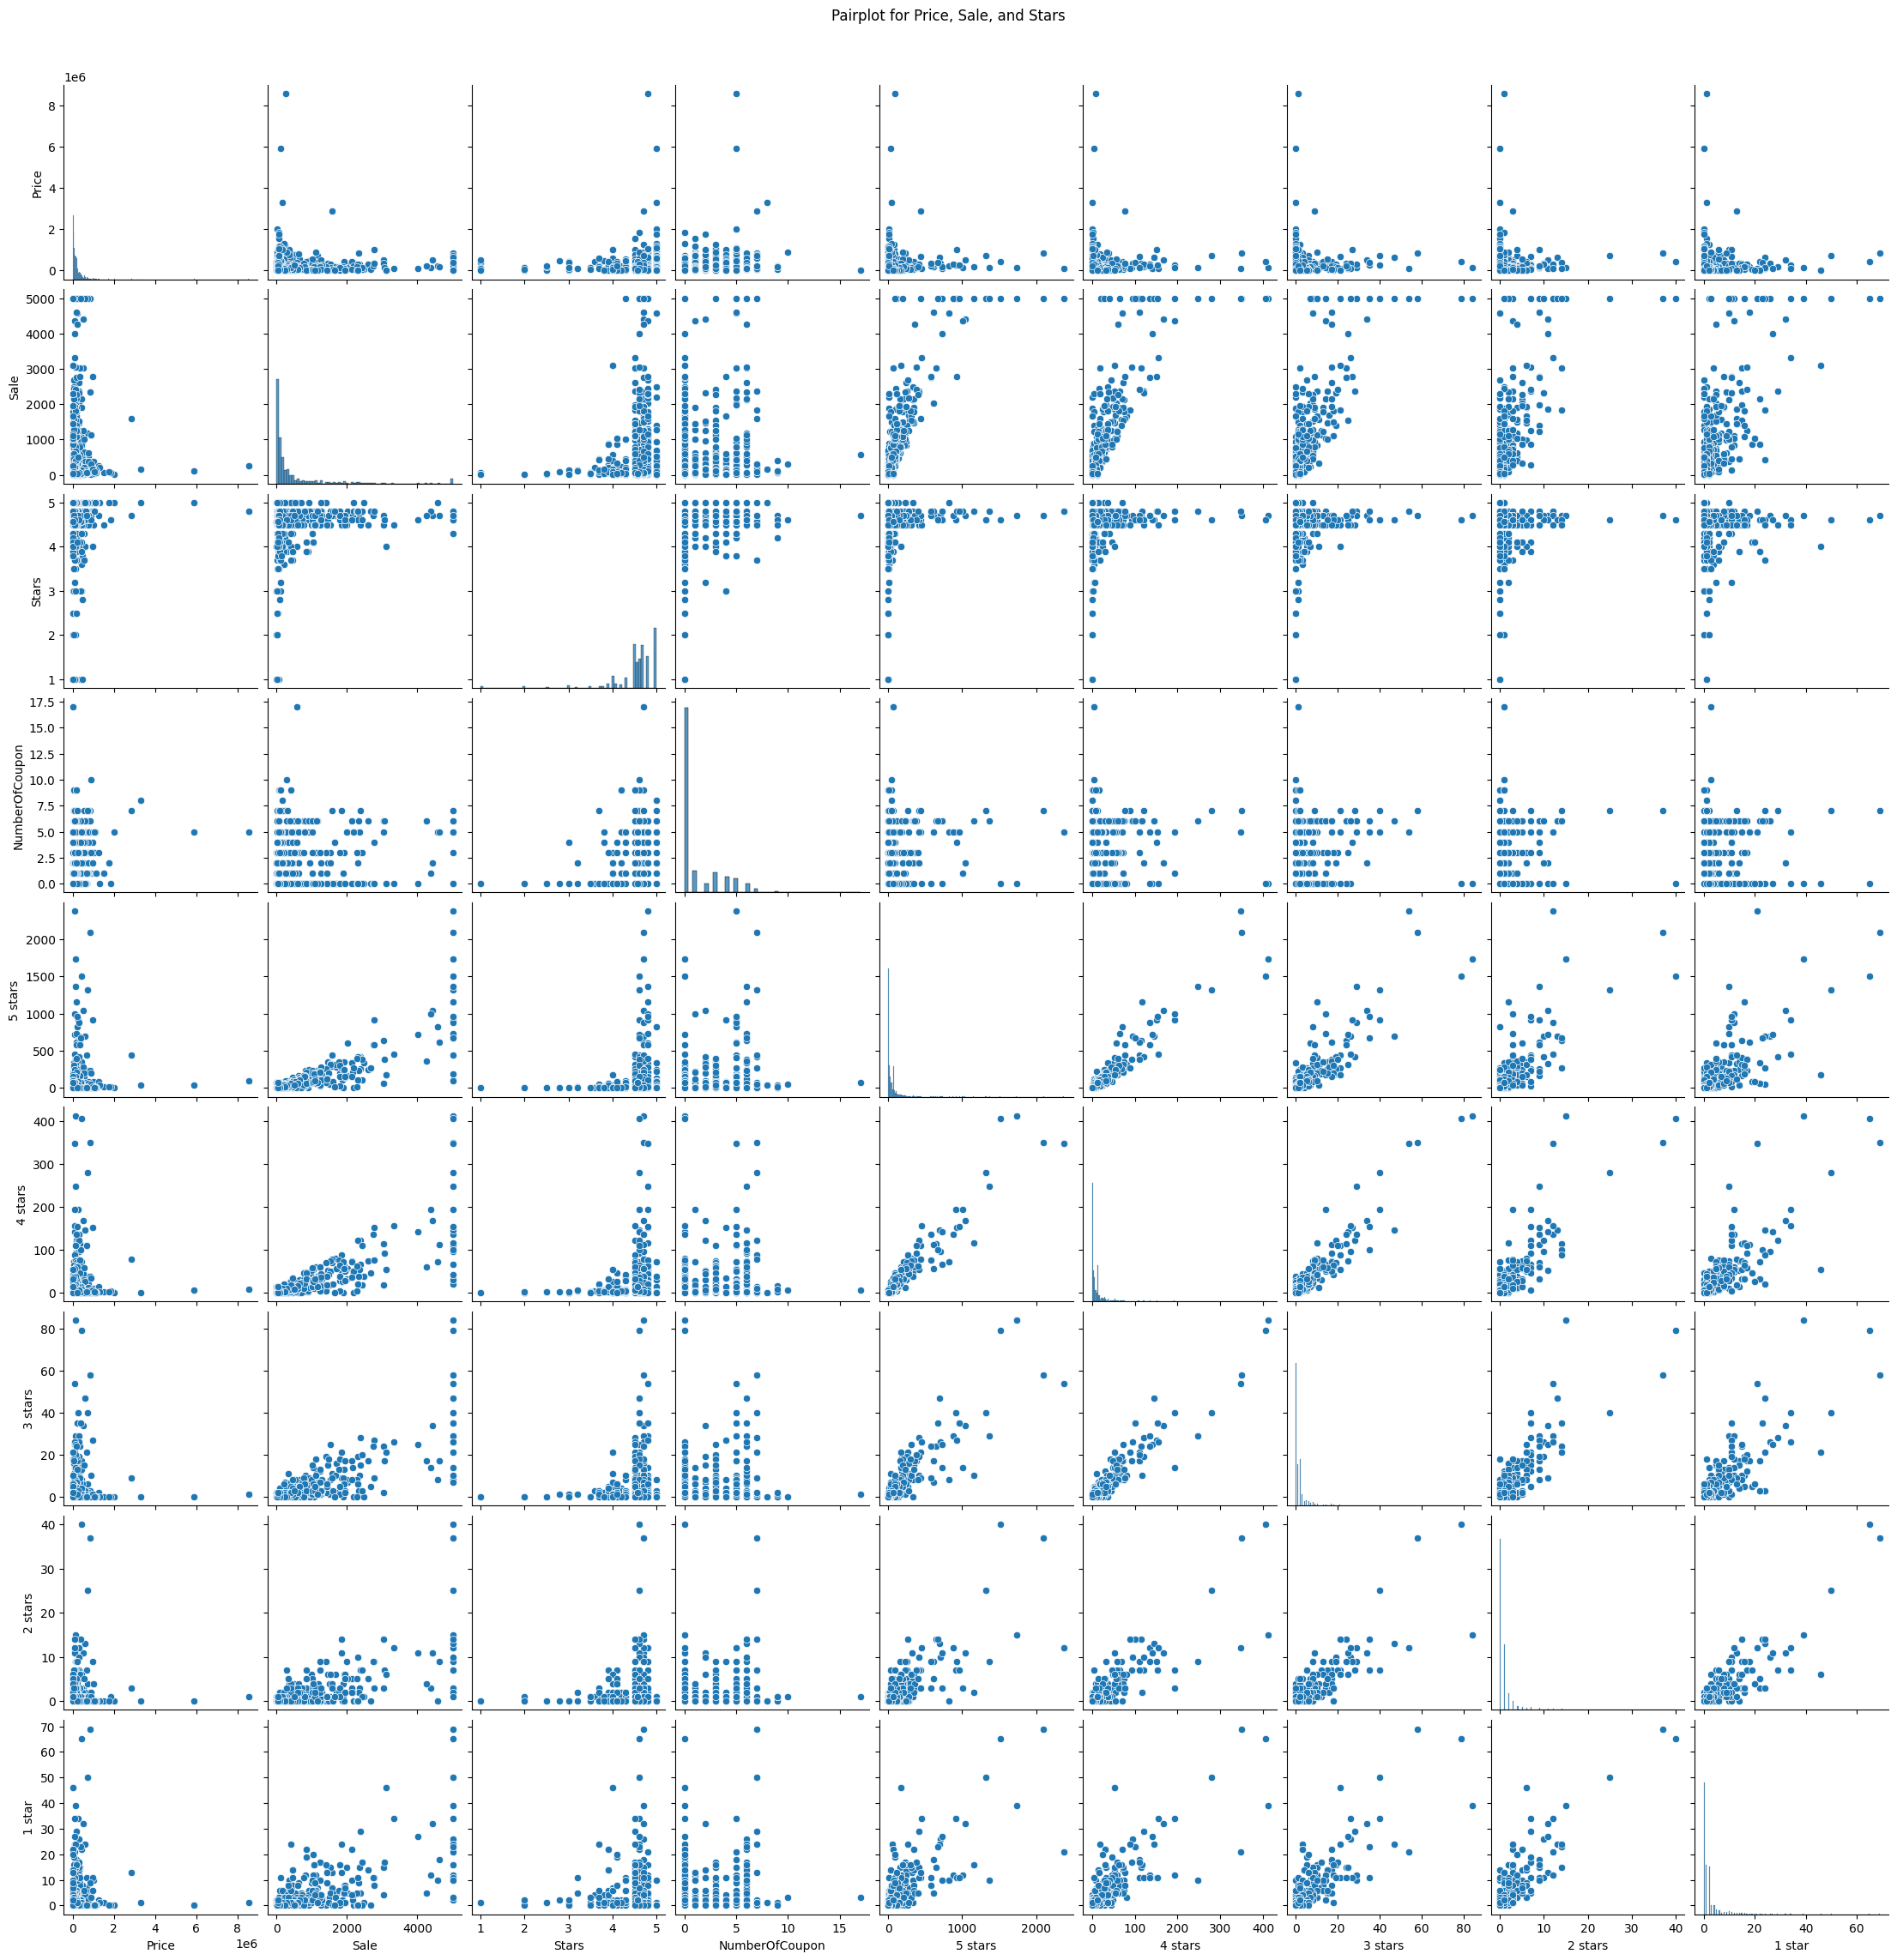

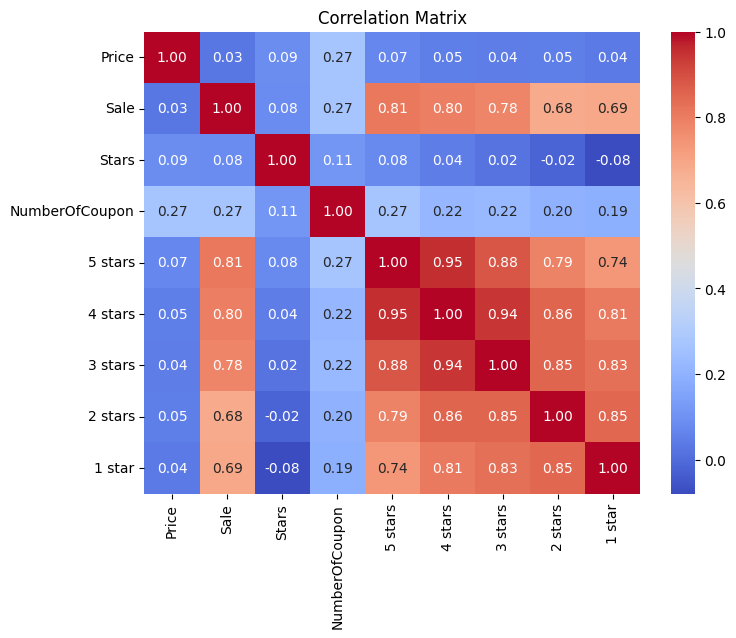

In [114]:
# Correlations: Check correlations between variables like 'Price', 'Sale', 'Stars', and 'Reviews' to understand relationships
selected_columns = ['Price', 'Sale', 'Stars', 'NumberOfCoupon', '5 stars', '4 stars', '3 stars', '2 stars', '1 star']

sns.pairplot(df[selected_columns].dropna())
plt.suptitle("Pairplot for Price, Sale, and Stars", y=1.02)
plt.show()

# Correlation matrix
correlation_matrix = df[selected_columns].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [115]:
import numpy as np
from collections import Counter
import random

In [116]:
from sklearn.model_selection import train_test_split
X = df[['Price', 'Stars', 'NumberOfCoupon', '5 stars', '4 stars', '3 stars', '2 stars', '1 star', 'Category']]
y = df['Sale']
X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [117]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=20, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        if not y.any():  # Checking if any elements are present in the array
            return None  # Or handle it as required
        counter = Counter(y)
        if not counter:
            return None  # Or handle it as required
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if node.threshold is not None and x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        elif node.threshold is not None:  # Ensure node.threshold exists before comparison
            return self._traverse_tree(x, node.right)
        else:
            # Handle cases where node.threshold is None (could be a leaf or a node without a threshold)
            return None  # Or handle it as required
        

class RandomForest:
    def __init__(self, n_trees=10, max_depth=100, min_samples_split=2, n_feature=None):
        self.n_trees = n_trees
        self.max_depth=max_depth
        self.min_samples_split=min_samples_split
        self.n_features=n_feature
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for index in range(self.n_trees):
            tree = DecisionTree(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                n_features=self.n_features
            )
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
            print(f"Tree {index} created.")

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        if not y.any():  # Checking if any elements are present in the array
            return None  # Or handle it as required
        counter = Counter(y)
        if not counter:
            return None  # Or handle it as required
        value = counter.most_common(1)[0][0]
        return value
        
    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions


In [118]:
clf = RandomForest(n_trees=100)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

Tree 0 created.
Tree 1 created.
Tree 2 created.
Tree 3 created.
Tree 4 created.
Tree 5 created.
Tree 6 created.
Tree 7 created.
Tree 8 created.
Tree 9 created.
Tree 10 created.
Tree 11 created.
Tree 12 created.
Tree 13 created.
Tree 14 created.
Tree 15 created.
Tree 16 created.
Tree 17 created.
Tree 18 created.
Tree 19 created.
Tree 20 created.
Tree 21 created.
Tree 22 created.
Tree 23 created.
Tree 24 created.
Tree 25 created.
Tree 26 created.
Tree 27 created.
Tree 28 created.
Tree 29 created.
Tree 30 created.
Tree 31 created.
Tree 32 created.
Tree 33 created.
Tree 34 created.
Tree 35 created.
Tree 36 created.
Tree 37 created.
Tree 38 created.
Tree 39 created.
Tree 40 created.
Tree 41 created.
Tree 42 created.
Tree 43 created.
Tree 44 created.
Tree 45 created.
Tree 46 created.
Tree 47 created.
Tree 48 created.
Tree 49 created.
Tree 50 created.
Tree 51 created.
Tree 52 created.
Tree 53 created.
Tree 54 created.
Tree 55 created.
Tree 56 created.
Tree 57 created.
Tree 58 created.
Tree 59

In [119]:
print("Prediction sale:")
print(predictions.astype(int))

Prediction sale:
[  45    9   73   11  459   49  145   36  314    7  459    9  131  100
  292  313  175  446    3  397   41   62  852   16 5000 1916   46  121
   10    7   28  238  361  313  958   20  101 1654   20  107   71   24
 1033   99  135  924   37   11   30   92  411   57  108  403  632  158
  207  207   14  659  170  632    6 5000  131   39   32  604  346   91
  621  119   67  193   52  363   60 5000  459   88  101  298 1033    2
  207    9   41  146    3   87  193   89   47 2747    1  535   41 3055
  142  300  167   58 1439  188  107   50  232   60 3055   80  108  103
  170 1246   57   90 1517  403   78  216   24 3105  149   68 1076   60
   86   83  446  589   34  206 2747   43   32   39  342  280   76   52
  632   87  169   76  119  151   20  130   12  197   78  930   12  315
    8 1107  319    3 5000    9   43  537    8   13  413   34  306  127
   67  207  621   57   68  459  196  693 1802  389  315   55 1091  145
  438 1154   83 1295   11   87    8  100    9 1792   34  516

In [120]:
print("Actual sale:")
print(y_test.astype(int))

Actual sale:
[  45   82   59   28  772   52  166   36  169   33  772  165  132  100
  292  524  230  446   42  357    2  116  417   16 5000 4267   30  121
   10    7    4   87  237  524 1284   30  102 1654   20   87  169   24
 1937   99  142  649   37   18   30   92  411   25  148  503  117  384
  381 1494   16  659  186   31    8 3326   58  104   34  604    5   91
 1082   80   67   87   57  885   31 2133  203   70  101  301  994   35
  250    8   41  126   10  102   66   89   47 2315    4  535   17 2372
  217  300  318   23 1439  223  552   72  232   45 2139   80  108  103
  170 1246   81   90 2175  503   78  325   24 3105  107   64  618   45
   86  130  446  589   34  206 2427   56   59   33  241  334  120   40
  156   67  417  118   80  151   20  636   17  186   91 1990   24  479
    6 1107  247    2 4609    9   56  461   15   20  413   25  277  187
  127  360  377   25  137  203  196  611  786  551  315   93 1091  254
  346 1154  130  708   10   56    8   95    8  479   20  203 500

In [121]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy
acc =  accuracy(y_test, predictions)
print("Percentage of y_test = predictions")
print(acc)

Percentage of y_test = predictions
0.28


In [122]:
def accuracy_with_tolerance(y_true, y_pred, tolerance=5):
    correct = np.sum(np.abs(y_true - y_pred) <= tolerance)
    accuracy = correct / len(y_true)
    return accuracy

acc = accuracy_with_tolerance(y_test, predictions, 20)
print("Percentage y_test = y_prediction +/- 20")
print(acc)

Percentage y_test = y_prediction +/- 20
0.505


In [123]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 155.755


In [124]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print("R^2 Score:", r2)

R^2 Score: 0.7722070383510248


In [125]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor()

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
predictions = rf_model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, predictions)
print("R^2 Score:", r2)

R^2 Score: 0.8425229596766513
